In [2]:
import requests
import json
import xmltodict
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
rcParams['axes.unicode_minus'] = False

In [4]:
# API 키
serviceKey = r'qD9EPBoeW3jjfktf3X%2Ftr3syHNjWfOzloUDZ5WfJwKtsyVCRzFy2v4OfNffjH5ulAtfuFrINMfhraiEFLeVmNQ%3D%3D'

In [5]:
# 정보 가져오기
baseUrl = 'http://apis.data.go.kr/B551015/API38_1/ticketSalesRanking_1?'
parameter = f'serviceKey={serviceKey}&pageNo=1&numOfRows=60'
totalUrl = baseUrl + parameter

In [6]:
totalUrl

'http://apis.data.go.kr/B551015/API38_1/ticketSalesRanking_1?serviceKey=qD9EPBoeW3jjfktf3X%2Ftr3syHNjWfOzloUDZ5WfJwKtsyVCRzFy2v4OfNffjH5ulAtfuFrINMfhraiEFLeVmNQ%3D%3D&pageNo=1&numOfRows=60'

In [7]:
# 텍스트로 읽기
res = requests.get(totalUrl)
res.status_code
res.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><amtOrd>1</amtOrd><exaAmt>0</exaAmt><meet>서울</meet><plcAmt>279883200</plcAmt><qnlAmt>10794303700</qnlAmt><qplAmt>0</qplAmt><rcDate>20020908</rcDate><rcNo>12</rcNo><tlaAmt>0</tlaAmt><totalAmt>11156888600</totalAmt><triAmt>0</triAmt><winAmt>82701700</winAmt></item><item><amtOrd>2</amtOrd><exaAmt>0</exaAmt><meet>서울</meet><plcAmt>201144500</plcAmt><qnlAmt>10764621900</qnlAmt><qplAmt>0</qplAmt><rcDate>20020407</rcDate><rcNo>12</rcNo><tlaAmt>0</tlaAmt><totalAmt>11055846400</totalAmt><triAmt>0</triAmt><winAmt>90080000</winAmt></item><item><amtOrd>3</amtOrd><exaAmt>0</exaAmt><meet>서울</meet><plcAmt>289923400</plcAmt><qnlAmt>10530159600</qnlAmt><qplAmt>0</qplAmt><rcDate>20020915</rcDate><rcNo>13</rcNo><tlaAmt>0</tlaAmt><totalAmt>10918529500</totalAmt><triAmt>0</triAmt><winAmt>98446500</winAmt></item><item><amtOrd>4</amtOrd><exaAmt>

In [98]:
# 제이슨으로 읽기
json.dumps(xmltodict.parse(res.text))

dictTemp = xmltodict.parse(res.text)

In [9]:
# 판다스로 읽기
pd.DataFrame(dictTemp['response'])

,header,body
resultCode,00,NaN
resultMsg,NORMAL SERVICE.,NaN
items,NaN,"{'item': [{'amtOrd': '1', 'exaAmt': '0', 'meet..."
numOfRows,NaN,60
pageNo,NaN,1
totalCount,NaN,500


In [10]:
# url 가져오는 함수 생성
def getRequestUrl(url):
    try:
        res = requests.get(url, verify= False)
        if res.status_code == 200:
            return res.text
    except Exception as e:
        print(f'getRequestUrl() 함수 호출 예외 : {e}')
        return None

In [11]:
# 데이터 가져오는 함수 페이지 수를 통해서 가져올 범위 지정가능
def getData(pageNo):
    serviceKey = r'qD9EPBoeW3jjfktf3X%2Ftr3syHNjWfOzloUDZ5WfJwKtsyVCRzFy2v4OfNffjH5ulAtfuFrINMfhraiEFLeVmNQ%3D%3D'
    baseUrl = 'http://apis.data.go.kr/B551015/API38_1/ticketSalesRanking_1?'
    parameter = f'serviceKey={serviceKey}&pageNo={pageNo}&numOfRows=60'
    
    totalUrl = baseUrl + parameter
    
    result = getRequestUrl(totalUrl)
    if result == None:
        return None
    else:
        return result

In [14]:
from tqdm import tqdm

In [15]:
# 함수를 통해 데이터 가져오고 정보 저장
Datas = []

for i in tqdm(range(1,11)):
    pageNo = i
    data = getData(pageNo)
    if xmltodict.parse(data)['response']['body']['items'] == None:
        resList = []
    else:
        resList = xmltodict.parse(data)['response']['body']['items']['item']

    Datas = Datas+resList

100%|██████████| 10/10 [00:15<00:00,  1.51s/it]


In [102]:
# 가져온 데이터의 수
len(Datas)

500

In [17]:
# 판다스로 변경
DatasList = pd.DataFrame(Datas)

In [105]:
# null값 확인
DatasList.isnull().sum()
DatasList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   amtOrd    500 non-null    object
 1   exaAmt    500 non-null    object
 2   meet      500 non-null    object
 3   plcAmt    500 non-null    object
 4   qnlAmt    500 non-null    object
 5   qplAmt    500 non-null    object
 6   rcDate    500 non-null    object
 7   rcNo      500 non-null    object
 8   tlaAmt    500 non-null    object
 9   totalAmt  500 non-null    object
 10  triAmt    500 non-null    object
 11  winAmt    500 non-null    object
dtypes: object(12)
memory usage: 47.0+ KB


In [18]:
# 엑셀로 데이터 저장
DatasList.to_excel('./data/경마매출순위.xlsx',index = False)

In [19]:
# 다시 불러오기
Datas1 = pd.read_excel('./data/경마매출순위.xlsx')

In [53]:
# 데이터 타입이 변경된걸 확인
Datas1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   amtOrd    500 non-null    int64 
 1   exaAmt    500 non-null    int64 
 2   meet      500 non-null    object
 3   plcAmt    500 non-null    int64 
 4   qnlAmt    500 non-null    int64 
 5   qplAmt    500 non-null    int64 
 6   rcDate    500 non-null    int64 
 7   rcNo      500 non-null    int64 
 8   tlaAmt    500 non-null    int64 
 9   totalAmt  500 non-null    int64 
 10  triAmt    500 non-null    int64 
 11  winAmt    500 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 47.0+ KB


In [20]:
# 가져온 데이터중 매출이 최종 매출이 가장 좋았던 날을 찾는다
Datas1.sort_values(by=['totalAmt'],ascending=False)

,amtOrd,exaAmt,meet,plcAmt,qnlAmt,qplAmt,rcDate,rcNo,tlaAmt,totalAmt,triAmt,winAmt
0,1,0,서울,279883200,10794303700,0,20020908,12,0,11156888600,0,82701700
1,2,0,서울,201144500,10764621900,0,20020407,12,0,11055846400,0,90080000
2,3,0,서울,289923400,10530159600,0,20020915,13,0,10918529500,0,98446500
3,4,0,서울,150472800,10600735200,0,20020526,12,0,10854858600,0,103650600
4,5,0,서울,193146800,10517902300,0,20020331,12,0,10829078000,0,118028900
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,1576939100,서울,81348800,5067093800,512258400,20070506,11,0,7278141000,0,40500900
496,497,1445420700,서울,53222700,3822258000,333654400,20120513,10,1567203500,7276109800,0,54350500
497,498,1459148900,서울,108058500,5646153600,0,20020519,7,0,7275995400,0,62634400
498,499,0,서울,268738500,6928995500,0,20030420,10,0,7273834900,0,76100900


In [21]:
# 경주장소, 일자, 날짜, 총 매출액을 제외한 값 삭제
Datas2 = Datas1.drop(Datas1.columns[[1,3,4,5,8,10,11]], axis=1)

In [23]:
# 컬럼명 변경
Datas2 = Datas2.rename(columns={'amtOrd':'매출순위','meet':'시행경마장명','rcDate':'경주일자','rcNo':'경주번호','totalAmt':'전체매출액'})

In [22]:
# 콤마 찍기와 타입 변경을 위해서 따로 저장
Datas3 = Datas2.rename(columns={'amtOrd':'매출순위','meet':'시행경마장명','rcDate':'경주일자','rcNo':'경주번호','totalAmt':'전체매출액'})

In [25]:
# 천단위 콤마
Datas3['전체매출액'] = Datas3['전체매출액'].apply(lambda int_num : '{:,}'.format(int_num))

In [26]:
# 경주일자 타입 변경
Datas3['경주일자'] = Datas3['경주일자'].astype('str')

In [27]:
# 경주일자를 연년월로 나눔
Datas3['경주일자'] = Datas3['경주일자'].apply(lambda _ : datetime.strptime(_,'%Y%m%d'))

In [28]:
# 엑셀로 따로 저장
Datas3.to_excel('./data/경마매출액_정렬.xlsx', index= False)

In [62]:
# 불러오기
Datas4 = pd.read_excel('./data/경마매출액_정렬.xlsx')

In [63]:
# 매출액 TOP10
DataTOP10 = Datas4.head(10)

In [67]:
DataTOP10

,매출순위,시행경마장명,경주일자,경주번호,전체매출액
0,1,서울,2002-09-08,12,"11,156,888,600"
1,2,서울,2002-04-07,12,"11,055,846,400"
2,3,서울,2002-09-15,13,"10,918,529,500"
3,4,서울,2002-05-26,12,"10,854,858,600"
4,5,서울,2002-03-31,12,"10,829,078,000"
5,6,서울,2002-03-17,12,"10,752,341,600"
6,7,서울,2002-03-10,12,"10,693,804,100"
7,8,서울,2002-07-14,12,"10,586,176,300"
8,9,서울,2002-05-12,12,"10,475,395,300"
9,10,서울,2001-12-23,11,"10,460,011,400"


In [117]:
# 경주 번호의 갯수 10,11,12에 사람들은 많은 투자를 한다
Datas4['경주번호'].value_counts()

경주번호
11    148
12    113
10     84
9      58
8      42
7      25
6      11
5       9
13      7
4       3
Name: count, dtype: int64

##### 연도별로 전체 매출액 그래프로 시각화

In [95]:
# 경주일로 데이터 정렬
var1 = Datas2.sort_values(by=['경주일자'],ascending=False)

In [106]:
# 전체매출액으로 데이터 정렬
var2 = Datas2.sort_values(by=['전체매출액'],ascending=False)

In [113]:
# 데이터의 평균
var2['전체매출액'].mean()

8129575341.4

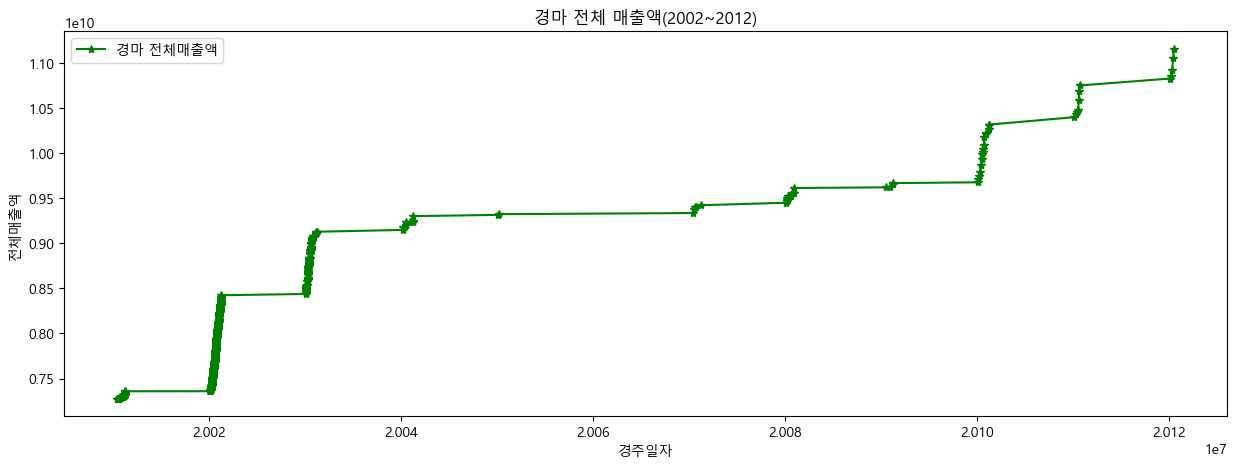

In [259]:
# 년도별 매출액
plt.figure(figsize=(15,5))
plt.plot(var1['경주일자'],var2['전체매출액'],label = '경마 전체매출액',color = 'g', marker='*')
plt.title('경마 전체 매출액(2002~2012)')
plt.xlabel('경주일자')
plt.ylabel('전체매출액')
plt.legend(loc='upper left')
plt.show()

In [240]:
var2TOP100 = var2.head(100)

In [260]:
# 경주번호 분포 확인
var2TOP100['경주번호'].value_counts()

경주번호
12    47
11    23
10    13
9     11
13     4
8      1
7      1
Name: count, dtype: int64

In [242]:
# 경주번호로 그룹
va1 = var2TOP100.groupby('경주번호')

In [243]:
# 경주번호별 전체매출 더하기
va2 = va1['전체매출액'].sum()

In [250]:
# 매출이 높은 순위로 정렬
va4 = va2.sort_values(ascending=False)

In [244]:
# 경주번호 중복 삭제후 저장
va3 = var2TOP100['경주번호'].drop_duplicates()

Text(0, 0.5, '전체매출')

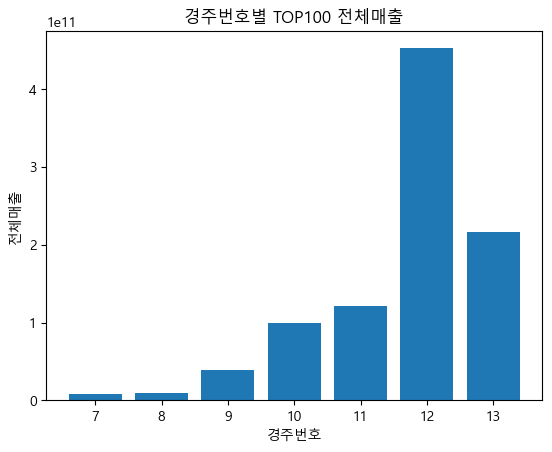

In [258]:
# 매출 순위 TOP100의 번호별 전체 매출 분포
plt.bar(va3,va4)
plt.title('경주번호별 TOP100 전체매출')
plt.xlabel('경주번호')
plt.ylabel('전체매출')


##### 결론
- 이 데이터를 활용할 일은 없어보인다.
- 데이터상 가장 매출이 좋았던 날은 2012년이다
- 매출은 꾸준히 상승하는편이다
- 2002년에 매출의 평균이 유독 많이 모여있다
- 그래프를 그릴때 데이터 타입을 잘 확인해야한다
- 데이터에서 경주마의 이름과 1등이 많이 나오는 라인이 나오지 않아서 쓸모가없다

##### 학습내용
- OpenAPI 이용하여 데이터 가져오기
- 함수를 만들어서 여러개의 데이터 가져오기
- 판다스 이용하여 데이터 엑셀로 저장, 불러오기
- 데이터를 정렬 기준을 정하고 정렬하기
- 데이터 컬럼 삭제 및 이름 변경 해보기
- 데이터 타입 변화해서 천단위 콤마찍어보기
- 데이터에서 기준 정하고 TOP10 정하기
- 그래프로 시각화 해보기(bar 차트)

## 고생하셨습니다(__)